In [1]:
import pandas as pd

Getting K-12 claims (k_12), local government claims (lg), all public claims (public) 

In [3]:
k12 = pd.read_csv('data/cpuc_claims_k-12_programs_2017_2019.csv')

local_gov = pd.read_csv('data/cpuc_claims_local_gov.csv')
public = pd.read_csv('data/cpuc_with_budget.csv')

public.head()
budget = public[['ClaimID','Budget']]

lg = local_gov.copy()
k_12 = k12.copy()

k_12 = k_12.merge(budget, left_on='ClaimID', right_on='ClaimID', how='left')

# **Compare total budget of K-12 programs to budget of local government programs and entire public sector**

In [25]:
k12b = k_12['Budget'].sum()
lgb = lg['Budget'].sum()
pb = public['Budget'].sum()

In [27]:
lgb/pb

0.1810273313829334

In [28]:
k12b/pb

0.04593814878258844

check to make sure local gov programs and k12 programs are totally separate

In [29]:
k12ids = k_12['ClaimID'].to_list()

len(lg[lg['ClaimID'].isin(k12ids)])

^ 56 programs are both local government and k12

Doesn't matter too much for comparison, a pie chart can still be used, just have to filter out claims from public instead of just subtracting the two budgets..... not going to be exact.... could make slice that is both k12 but also thats super extra cuz this lil analysis doesn't matter that much

In [42]:
lgids = lg['ClaimID'].to_list()


ids = k12ids + lgids

other = public[public['ClaimID'].isin(ids)==False]

In [51]:
otherb = other['Budget'].sum()

# Pie Chart Time!

In [52]:
from matplotlib import pyplot as plt
import numpy as np


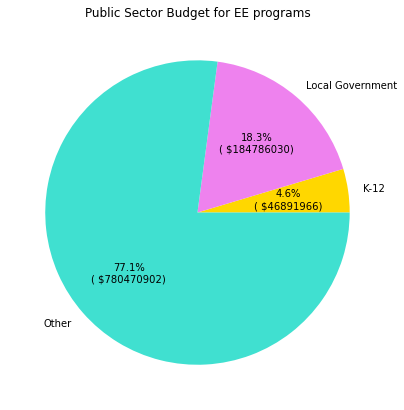

In [90]:
# Creating dataset
labels = ['K-12','Local Government', 'Other']
  
data = [k12b, lgb, otherb]

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n( ${:d})".format(pct, absolute)  

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  colors = ['gold', 'violet', 'turquoise'],
                                  labels = labels,
                                  textprops = dict(color ="black"))

ax.set_title("Public Sector Budget for EE programs")

# show plot
plt.show()

check that numbers are right

In [65]:
otherb

780470910.2089313

In [66]:
k12b

46891969.12969815

In [67]:
lgb

184786027.73078144